# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [3]:
from src.data.unified_dataloader import load_dataset

a, processed_german_credit = load_dataset('german_credit')
_, processed_uci = load_dataset('uci')

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [4]:
processed_german_credit.head(3)

,Age,sex,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,2.766456,0,-0.745131,-1.236478,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-1.191404,1,0.949817,2.248194,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1.183312,0,-0.416562,-0.738668,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
processed_uci.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 3. Split label/unlabel data, split train/test data.

In [6]:
'''UCI dataset'''
# df = processed_uci.copy()
# X = df.drop('income', axis=1)
# y = df['income']

'''German Credit dataset'''
df = processed_german_credit.copy()
X = df.drop('Risk', axis=1)
y = df['Risk']

# 10% X_label, 90% X_unlabel
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X, y, test_size=0.9, random_state=25) 
print(f'X_label shape: {X_label.shape}')
print(f'X_unlabel shape: {X_unlabel.shape}')
print('---------------------------------')
# split labeled data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.3, random_state=25) 
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_label shape: (100, 26)
X_unlabel shape: (900, 26)
---------------------------------
X_train shape: (70, 26)
X_test shape: (30, 26)


### 4. Train the original model

In [7]:
model = XGBClassifier()  # 可以替换为 RandomForestClassifier() 等其他模型
model.fit(X_train,y_train)

# 预测和评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6


In [26]:
from src.baselines import Baseline

baseline = Baseline(X_train, y_train, X_test, y_test, X_unlabel, model='xgboost')
baseline.get_baseline1()

2025-01-07 17:07:17.484 | INFO     | src.baselines:get_baseline1:44 - baseline1: 使用了xgboost, Accuracy: 0.600, DR: 0.0106


In [27]:
baseline.get_baseline2()

2025-01-07 17:07:19.493 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 1, Accuracy: 0.567, DR: 0.0512
2025-01-07 17:07:19.603 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 2, Accuracy: 0.700, DR: 0.0552
2025-01-07 17:07:19.725 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.2, num_new_data: 3, Accuracy: 0.667, DR: 0.0576
2025-01-07 17:07:19.843 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 1, Accuracy: 0.600, DR: 0.0277
2025-01-07 17:07:19.978 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 2, Accuracy: 0.600, DR: 0.0527
2025-01-07 17:07:20.095 | INFO     | src.baselines:get_baseline2:70 - baseline2: 使用了xgboost, proportion: 0.4, num_new_data: 3, Accuracy: 0.700, DR: 0.1098
2025-01-07 17:07:20.185 | INFO     | src.baselines:get_baseline2:70 - 

In [28]:
baseline.get_baseline3()

2025-01-07 17:08:02.343 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 1, Accuracy: 0.700, DR: 0.0000
2025-01-07 17:08:02.476 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 2, Accuracy: 0.700, DR: 0.0052
2025-01-07 17:08:02.614 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.2, num_new_data: 3, Accuracy: 0.667, DR: 0.0085
2025-01-07 17:08:02.742 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 1, Accuracy: 0.667, DR: 0.0135
2025-01-07 17:08:02.924 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 2, Accuracy: 0.667, DR: 0.0281
2025-01-07 17:08:03.074 | INFO     | src.baselines:get_baseline3:105 - baseline3: 使用了xgboost, proportion: 0.4, num_new_data: 3, Accuracy: 0.700, DR: 0.0231
2025-01-07 17:08:03.229 | INFO     | src.baselines:get_baseline3

In [8]:
'''
This cell is used to apply the sex balance to the original train set ---- as the baseline
'''

def balance_sex_distribution(df, dataset):
    """
    平衡数据集中性别分布，使得男性和女性样本数量相等
    
    Parameters:
    -----------
    df : pd.DataFrame
        需要平衡的数据集
    sex_column : str
        性别列的名称
        
    Returns:
    --------
    pd.DataFrame
        平衡后的数据集
    """
    if dataset == 'german_credit':
        sex_column='sex' 
    elif dataset == 'uci':
        sex_column='sex'
        
    # 分别获取性别为0和1的数据
    sex_0 = df[df[sex_column] == 0]
    sex_1 = df[df[sex_column] == 1]
    # 获取较小的样本数
    min_count = min(len(sex_0), len(sex_1))
    # 如果某一类样本数量更多，随机抽样减少到较小的数量
    if len(sex_0) > min_count:
        sex_0 = sex_0.sample(n=min_count, random_state=42)
    if len(sex_1) > min_count:
        sex_1 = sex_1.sample(n=min_count, random_state=42)
    # 合并平衡后的数据
    balanced_df = pd.concat([sex_0, sex_1])
    # 随机打乱数据顺序
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_df

train_df = pd.concat([X_train, y_train], axis=1)
balanced_train_df = balance_sex_distribution(train_df, dataset='german_credit')
X_train_sex_balanced = balanced_train_df.drop('Risk', axis=1)
y_train_sex_balanced = balanced_train_df['Risk']

model_sex_balanced = XGBClassifier()  
model_sex_balanced.fit(X_train_sex_balanced,y_train_sex_balanced)

# 预测和评估
y_pred_sex_balanced = model_sex_balanced.predict(X_test)
accuracy_sex_balanced = accuracy_score(y_test, y_pred_sex_balanced)
print(f'Accuracy sex balanced: {accuracy_sex_balanced}')

Accuracy sex balanced: 0.7333333333333333


### 5. Evaluate the performance of original model

In [9]:
from src.attribution.oracle_metric import perturb_numpy_ver
from src.attribution import FairnessExplainer
sen_att_name = ["sex"]
sen_att = [X_train.columns.get_loc(name) for name in sen_att_name]
priv_val = [1]
unpriv_dict = [list(set(X_train.values[:, sa])) for sa in sen_att]
for sa_list, pv in zip(unpriv_dict, priv_val):
    sa_list.remove(pv)
# print(f'sen_att_name:{sen_att_name}')
# print(f'sen_att:{sen_att}') # index of sensitive attribute
# print(f'priv_val:{priv_val}') # privileged value
# print(f'unpriv_dict:{unpriv_dict}') # unprivileged value(all values in the sensitive attribute, except the privileged value)

''' 
计算DR value的函数
'''
def fairness_value_function(sen_att, priv_val, unpriv_dict, X, model):
    X_disturbed = perturb_numpy_ver(
        X=X,
        sen_att=sen_att,
        priv_val=priv_val,
        unpriv_dict=unpriv_dict,
        ratio=1.0,
    )
    fx = model.predict_proba(X)[:, 1]
    fx_q = model.predict_proba(X_disturbed)[:, 1]
    return np.mean(np.abs(fx - fx_q))
original_DR = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model)
print(f'original_DR: {original_DR}')

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


original_DR: 0.010580012574791908


Test set fairness metrics (before mitigation):


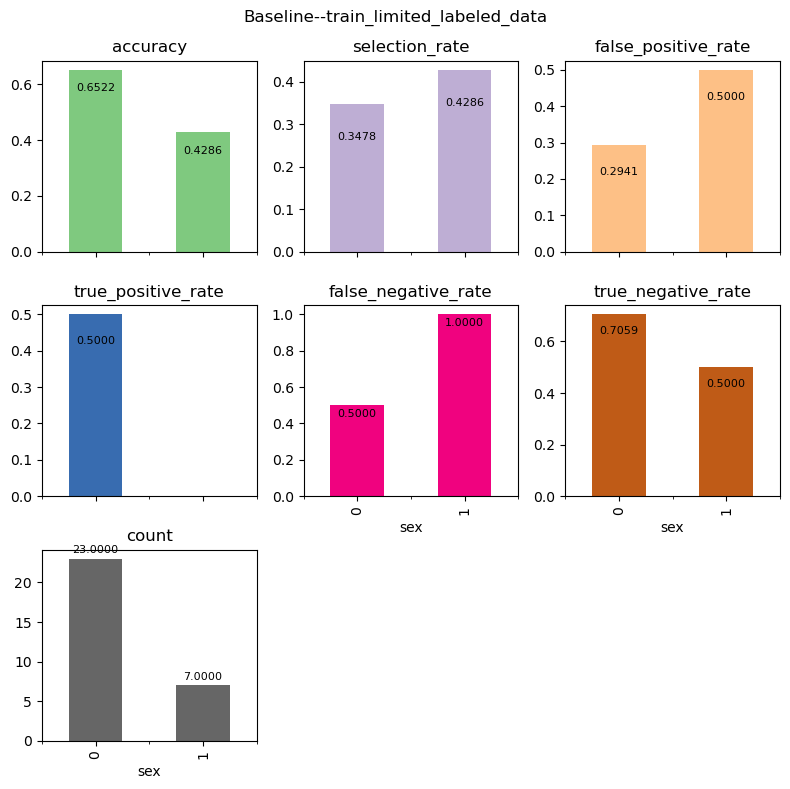

In [10]:
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, selection_rate,false_positive_rate,true_positive_rate,false_negative_rate,true_negative_rate,count
metrics = {'accuracy': accuracy_score,
           'selection_rate': selection_rate,
           'false_positive_rate': false_positive_rate,
           'true_positive_rate': true_positive_rate,
           'false_negative_rate': false_negative_rate,
           'true_negative_rate': true_negative_rate,
              'count': count}

# sensitive feature in X_test
a_test = X_test['sex']

mf_original = MetricFrame(metrics=metrics,
                 y_true=y_test,
                 y_pred=y_pred,
                 sensitive_features=a_test)

print("Test set fairness metrics (before mitigation):")

# 绘制柱状图
ax = mf_original.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[8, 8],
    colormap="Accent",
    title="Baseline--train_limited_labeled_data",
)

# 显示数值
for subplot in ax.flatten():  # 遍历每个子图
    if subplot is not None:
        for bar in subplot.patches:  # 遍历每个柱子
            height = bar.get_height()
            subplot.annotate(
                f"{height:.4f}",  # 格式化数值
                xy=(bar.get_x() + bar.get_width() / 2, height-0.1),
                xytext=(0, 3),  # 在柱子上方稍微偏移一些
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=8
            )

# 显示图形
plt.tight_layout()
plt.show()


### 5.(补充) Evaluate the performance of model with sex balanced original train set 

In [11]:
original_DR_sex_balanced = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model_sex_balanced)
print(f'original_DR_sex_balanced: {original_DR_sex_balanced}')
if original_DR > original_DR_sex_balanced:
    print(f'使用sex balance后，DR值减小了{original_DR - original_DR_sex_balanced}')
else:
    print(f'使用sex balance后, DR值增加了{original_DR_sex_balanced - original_DR}')

original_DR_sex_balanced: 0.09548411518335342
使用sex balance后, DR值增加了0.08490410447120667


Test set fairness metrics (before mitigation):


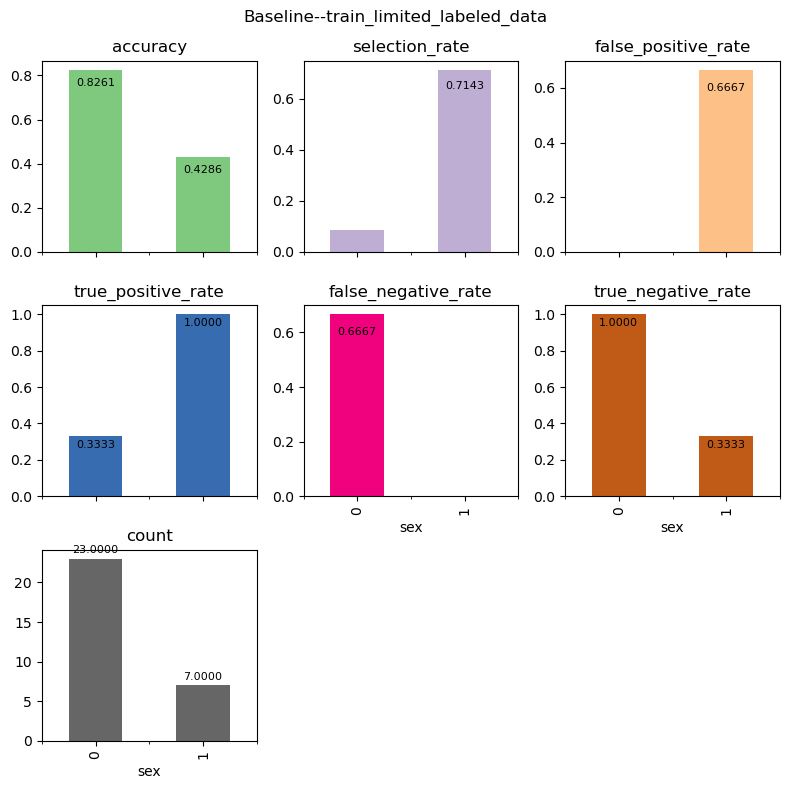

In [12]:
metrics = {'accuracy': accuracy_score,
           'selection_rate': selection_rate,
           'false_positive_rate': false_positive_rate,
           'true_positive_rate': true_positive_rate,
           'false_negative_rate': false_negative_rate,
           'true_negative_rate': true_negative_rate,
              'count': count}

# sensitive feature in X_test
a_test = X_test['sex']

mf_original = MetricFrame(metrics=metrics,
                 y_true=y_test,
                 y_pred=y_pred_sex_balanced,
                 sensitive_features=a_test)

print("Test set fairness metrics (before mitigation):")

# 绘制柱状图
ax = mf_original.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[8, 8],
    colormap="Accent",
    title="Baseline--train_limited_labeled_data",
)

# 显示数值
for subplot in ax.flatten():  # 遍历每个子图
    if subplot is not None:
        for bar in subplot.patches:  # 遍历每个柱子
            height = bar.get_height()
            subplot.annotate(
                f"{height:.4f}",  # 格式化数值
                xy=(bar.get_x() + bar.get_width() / 2, height-0.1),
                xytext=(0, 3),  # 在柱子上方稍微偏移一些
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=8
            )

# 显示图形
plt.tight_layout()
plt.show()


### 6. Start the experiment!

>1. 只使用10%的labeled data 查看模型结果-baseline （见4, 5）
>
>2. 只使用10%的labeled data + sex balance查看模型结果
>
>3. 使用10%的labeled data， 再使用unlabel data把labeled data中的sex补齐。（使用model预测的值对unlabel data贴标签）
>
>4. 使用10%的labeled data， 再使用unlabel data时候，让新增的data中 sex balanced（使用model预测的值对unlabel data贴标签）
>
>5. 使用10%的labeled data + sex balance + new data (from unlabeled data) + sex balance + 使用labeled data中最相似的instance的标签
>
>6. 使用10%的labeled data + sex balance + new data (from unlabeled data) + sex balance + 通过pretrained model对data进行label标注
>
>7.☆☆  这里的sex balance是如何选取好点？ 是分别找sex=0和sex=1的nearest neighbour(此处数量怎么限制？按照少数的来？)。
>   还是把他们放在一个大池子里。统一挑出来，最后再限制个数为min(num_sex0, num_sex1)， 如果这样的话，对unlabeled data标注方式感觉不能直接使用原标签，是否用ml预测的结果会更好一点？

In [13]:
from src.experiments import Experiment

In [14]:
my_experiment = Experiment(
            orginal_model=model, 
            X_train=X_train, 
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            X_unlabel=X_unlabel,
            y_unlabel=y_unlabel,
            dataset_name='german_credit')
'''
对于german credit，需要把 self.limited_values_range = np.arange(1, non_zero_count, 50)中的50 改成1
'''

'\n对于german credit，需要把 self.limited_values_range = np.arange(1, non_zero_count, 50)中的50 改成1\n'

开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 91
Proporation: 0.6, new_data_number: 3 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------


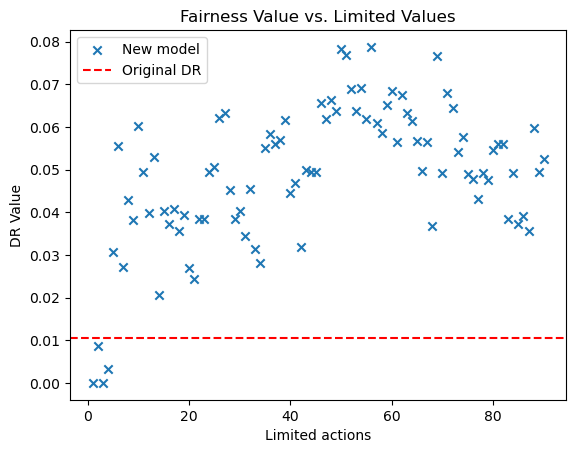

In [15]:
new_models_DR_values,_ = my_experiment.get_sex_separate_nn_result(
    sex_balance=False,
    proportion=0.6,
    replacement=True,
    num_new_data=3,
    matcher='nn',
    match_method='sex_separate'
)
my_experiment.visualize(new_models_DR_values)

### 1. X_train <-> Unlabel 配对

开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 38
Proporation: 0.2, new_data_number: 1 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 87
Proporation: 0.2, new_data_number: 2 训练结束, match_method:together,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_tra

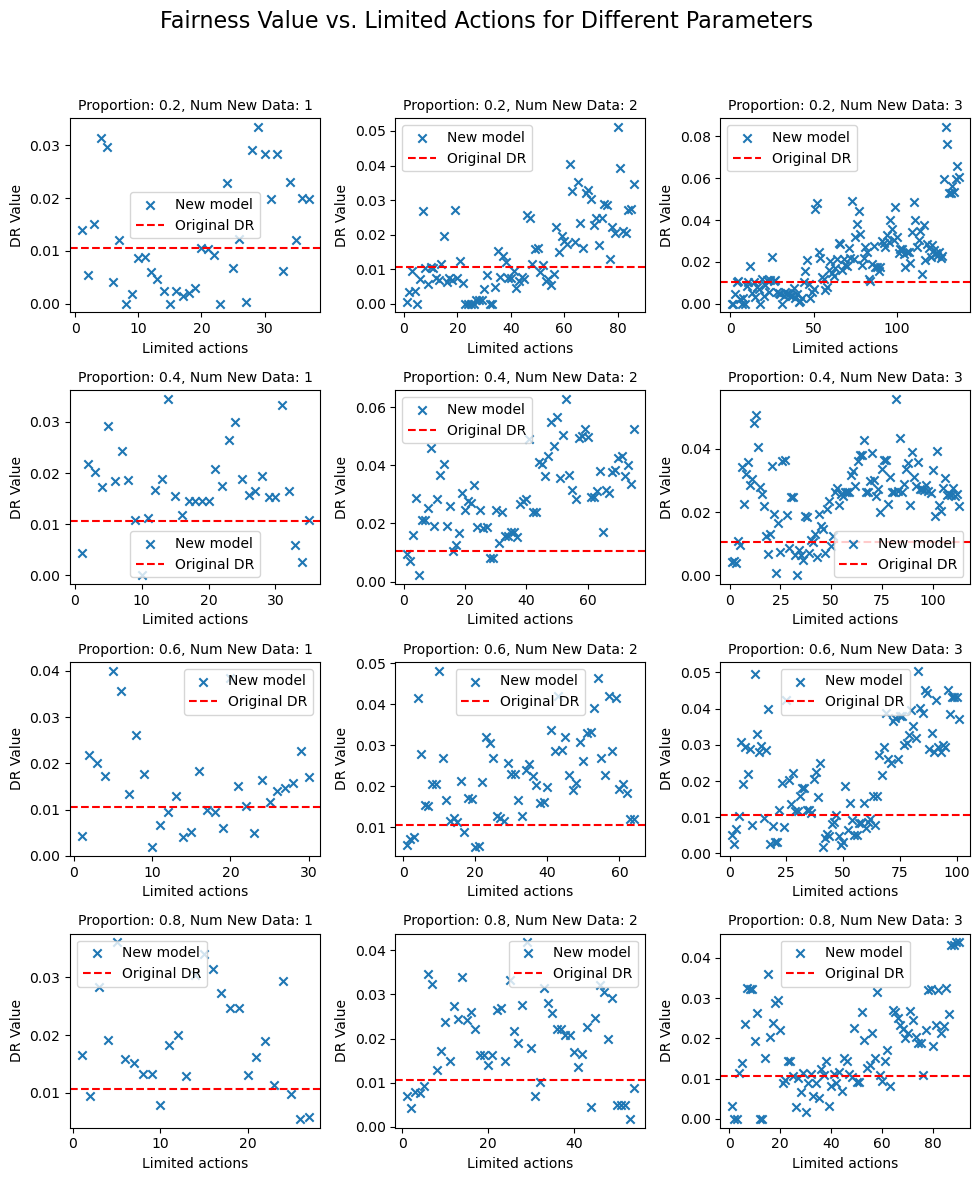

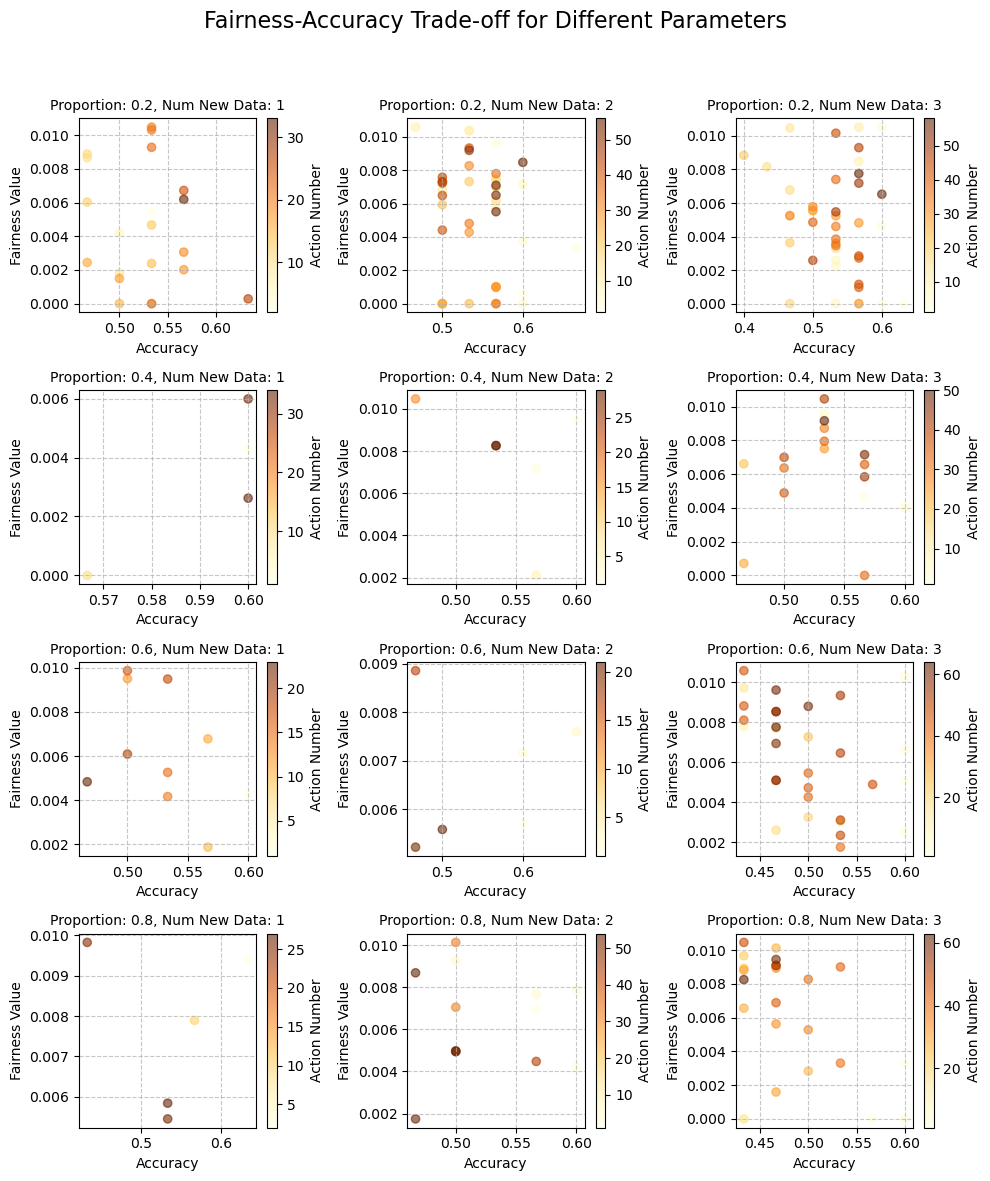

In [16]:
results = my_experiment.combination(match_met='together')

### 2. X_train_male <-> Unlabel_male， X_train_female <-> Unlabel_female 配对

开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 36
Proporation: 0.2, new_data_number: 1 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 78
Proporation: 0.2, new_data_number: 2 训练结束, match_method:sex_separate,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 

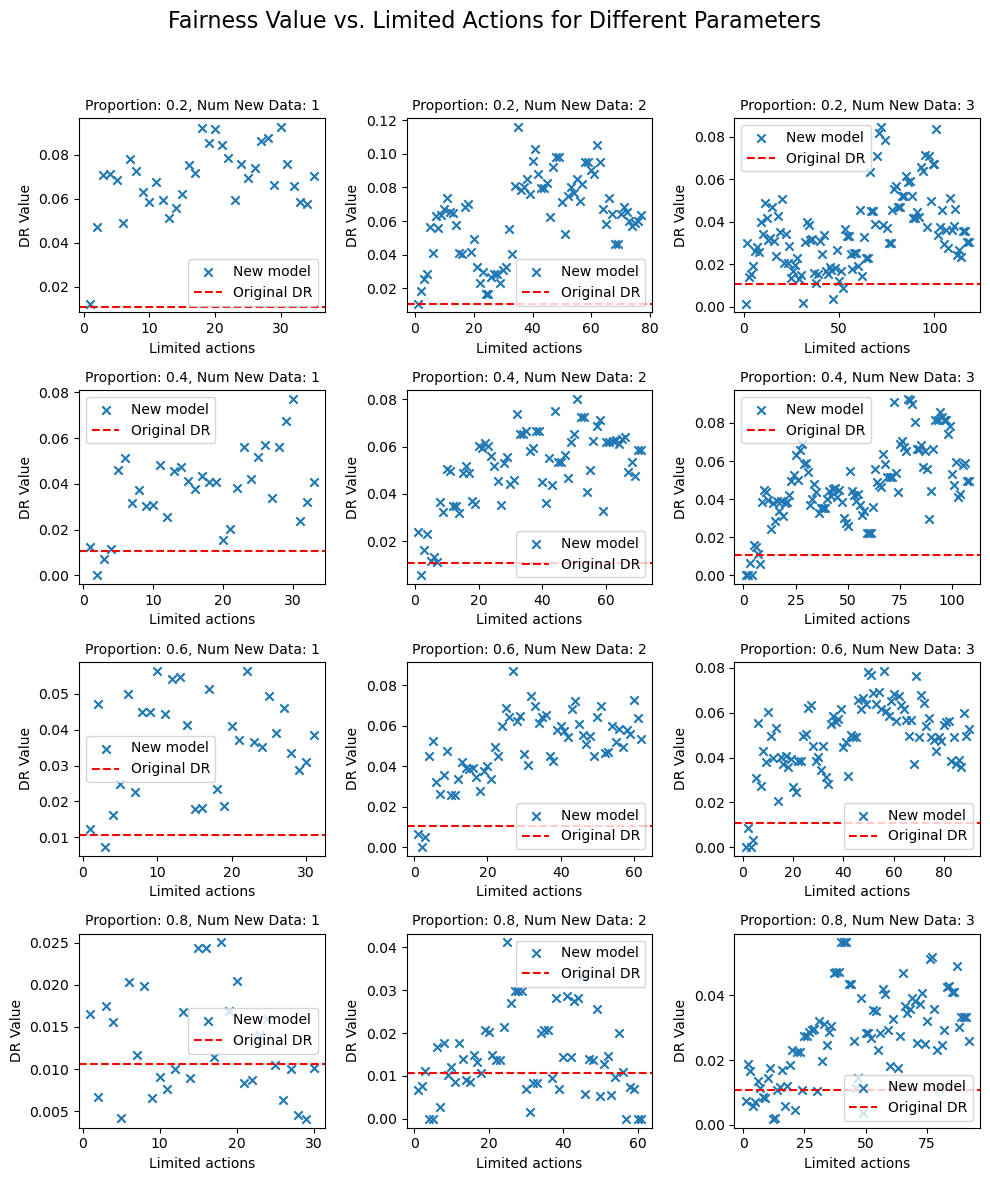

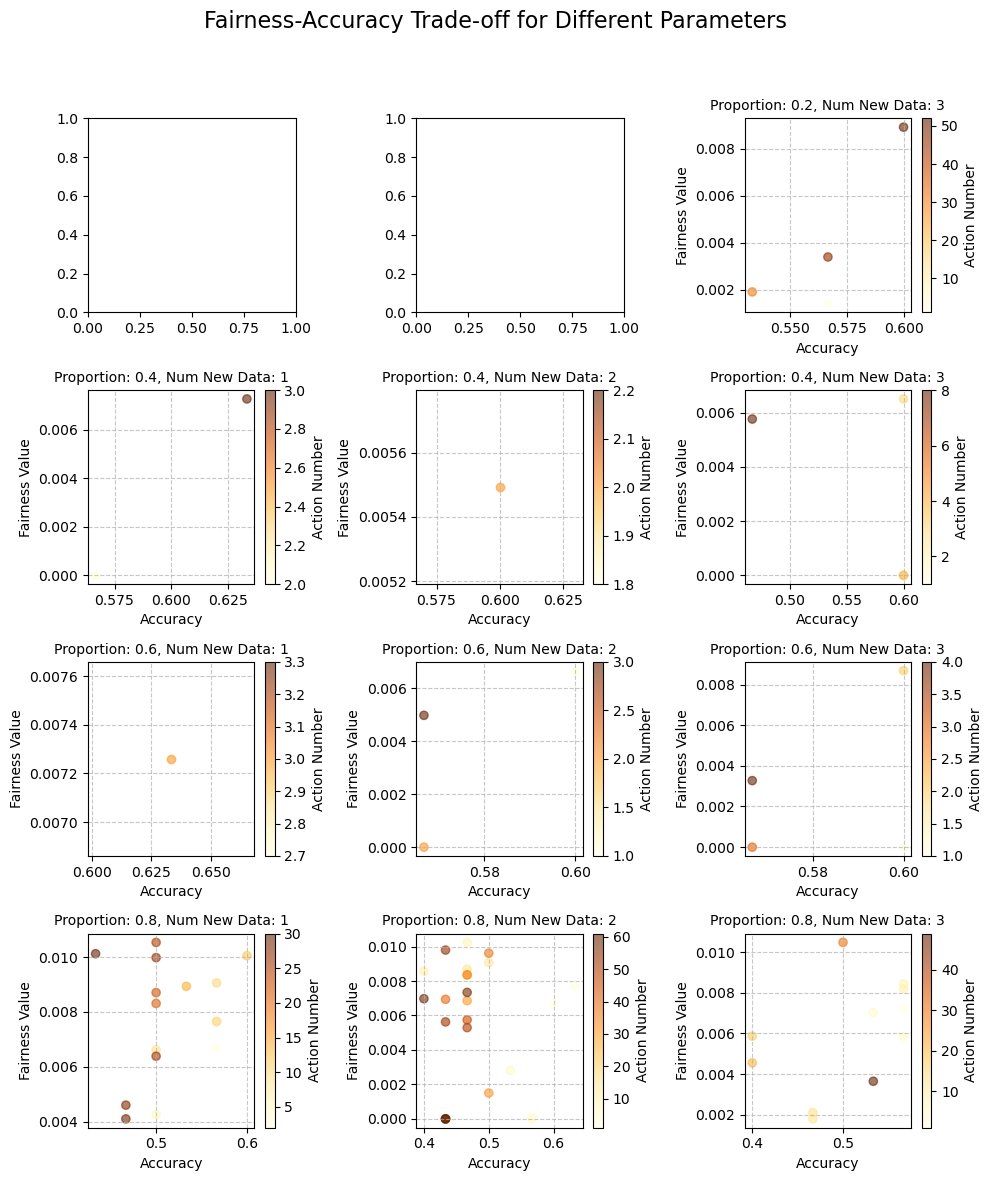

In [17]:
results_sex_separate = my_experiment.combination(match_met='sex_separate')

开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 136
Proporation: 0.6, new_data_number: 3 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------


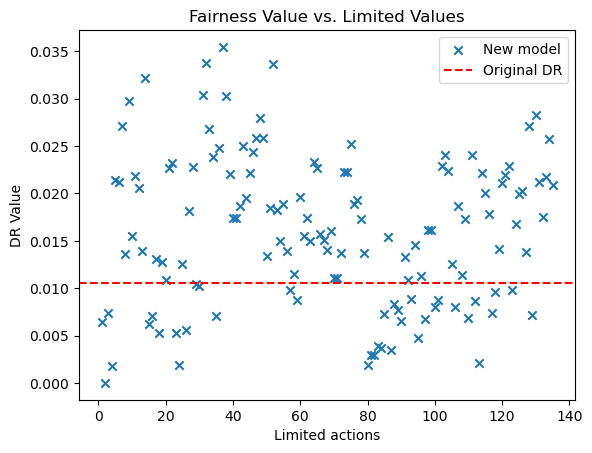

In [18]:
sex_cross_DR_values, _ = my_experiment.get_sex_separate_nn_result(
    sex_balance=False,
    proportion=0.6,
    replacement=True,
    num_new_data=3,
    matcher='nn',
    match_method='sex_cross'
)
my_experiment.visualize(sex_cross_DR_values)

### 3. X_train_male <-> Unlabel_female， X_train_female <-> Unlabel_male 配对

开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 45
Proporation: 0.2, new_data_number: 1 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_train中, 返回合并后的数据, 重新训练模型, 并且评估性能
Total number of non-zero values across all varphis: 89
Proporation: 0.2, new_data_number: 2 训练结束, match_method:sex_cross,DR值已经保存, 可以进行可视化
-----------------------------------------------------------------------------
开始第3步, 计算每组数据的fairness shapley value
开始第4步, 对shapely value不取绝对值, 然后把负值直接变成0, 然后在归一化, 得到新的varphi
开始第5步, 计算q
开始第6步, 计算出总共可以修改的actions number, 并且把新的unlabel data整合好, 加入到X_t

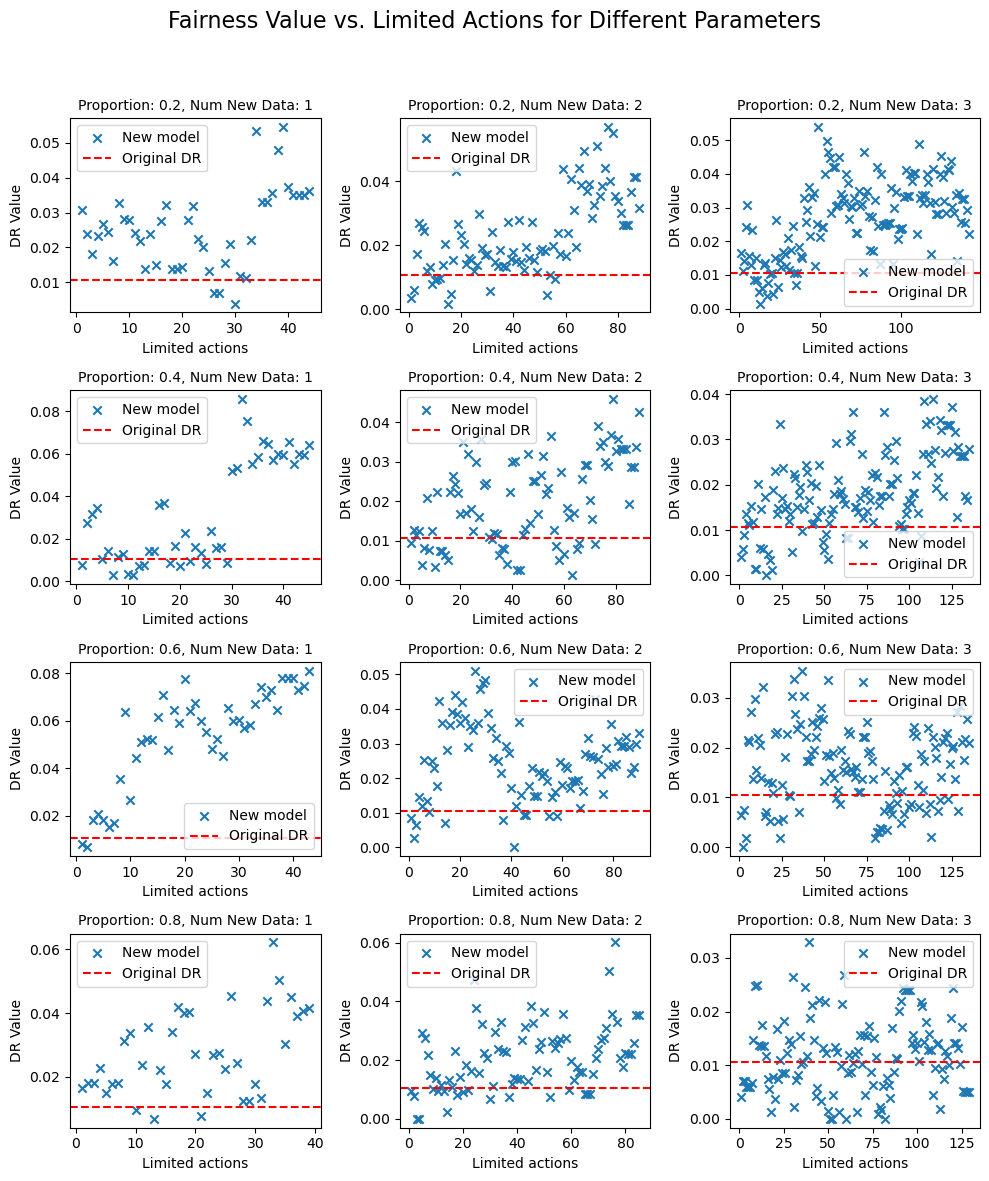

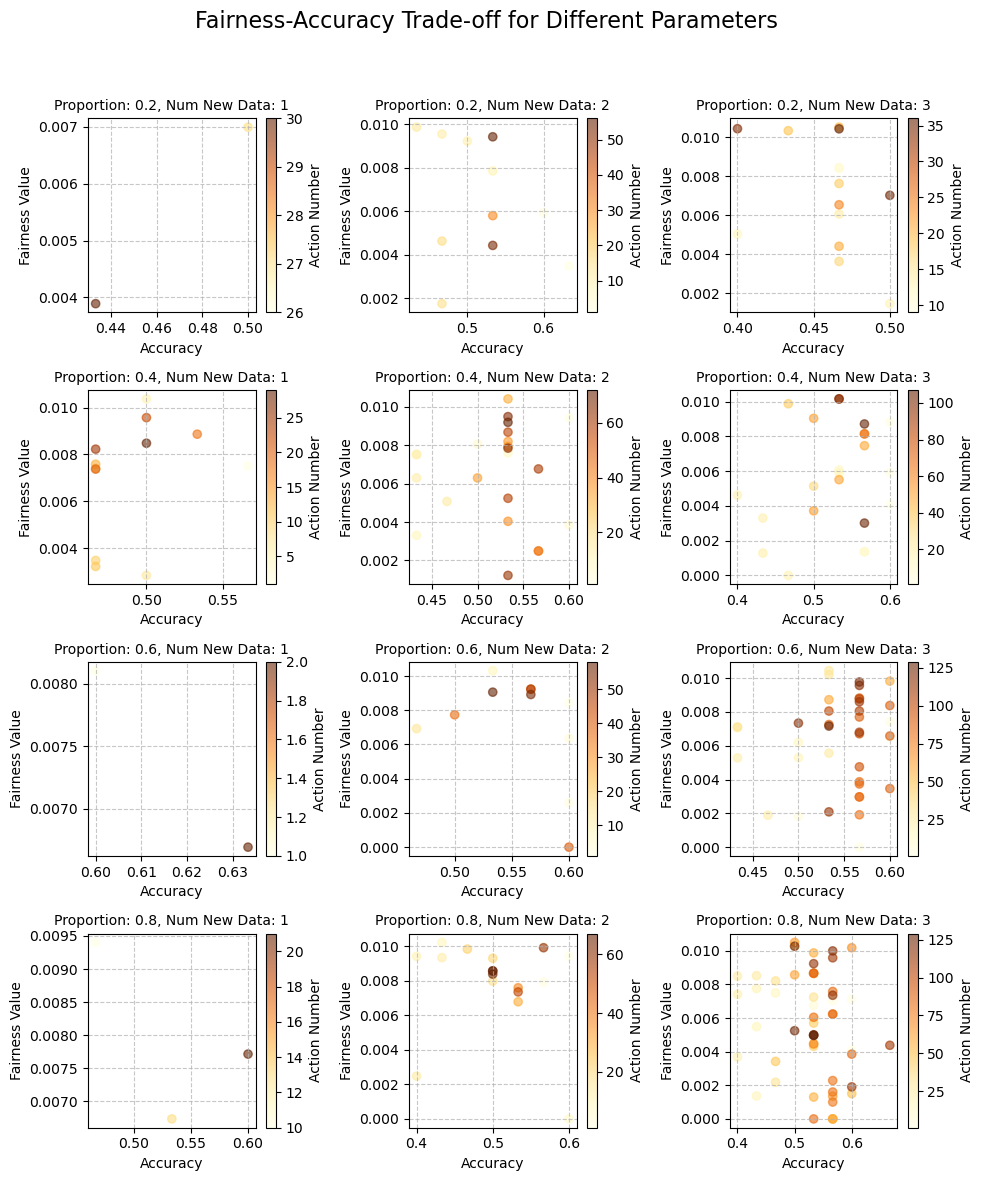

In [19]:
results_sex_cross = my_experiment.combination(match_met='sex_cross')